- Perform the operation X, Y, Z, H, S, T 
- Execute the operations on a state vector.
- Draw a simple circuit for these operation.
- Finally,  simulate the result of running this experiment  10000 times.
- Proof that R is square root of NOT  operation. where R is a Hadamard operation, followed by the S operation, followed by another Hadamard operation.


In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.visualization import plot_circuit_layout


In [2]:
X = Operator([[0, 1], [1, 0]])  # Pauli-X gate (NOT gate)
Y = Operator([[0, -1j], [1j, 0]])  # Pauli-Y gate
Z = Operator([[1, 0], [0, -1]])  # Pauli-Z gate
H = Operator([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]])  # Hadamard gate
S = Operator([[1, 0], [0, 1j]])  # S gate (phase gate)
T = Operator([[1, 0], [0, np.exp(1j * np.pi / 4)]])  # T gate (π/4 phase gate)

# Initialize the state vector |0⟩ as [1, 0]
initial_state = Statevector([1, 0])

In [3]:
def evolve_state(state):
    # Apply X, Y, Z, H, S, and T gates sequentially
    state = state.evolve(X)  # Apply X gate
    state = state.evolve(Y)  # Apply Y gate
    state = state.evolve(Z)  # Apply Z gate
    state = state.evolve(H)  # Apply Hadamard gate
    state = state.evolve(S)  # Apply S gate
    state = state.evolve(T)  # Apply T gate
    return state

In [4]:
final_state = evolve_state(initial_state)
display(final_state.draw('latex'))

<IPython.core.display.Latex object>

In [5]:
def verify_sqrt_not():
    # Create the quantum circuit to define R = HSH
    qc = QuantumCircuit(1)
    qc.h(0)  # Apply Hadamard
    qc.s(0)  # Apply S
    qc.h(0)  # Apply Hadamard again

    # Get the matrix representation of R
    R = qc.to_gate(label='R')  # Convert the circuit to a gate
    R_matrix = R.to_matrix()  # Get the matrix representation

    # Define sqrt(X) matrix explicitly
    sqrt_X = np.array([[1 + 1j, 1 - 1j], [1 - 1j, 1 + 1j]]) / 2
    
    # Compare matrices to see if they are approximately equal
    is_equal = np.allclose(R_matrix, sqrt_X)
    
    return is_equal, R_matrix, sqrt_X


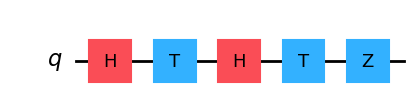

In [6]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout

# Define the circuit
circuit = QuantumCircuit(1)

# Apply gates
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

# Draw the circuit using 'mpl' for Matplotlib rendering
circuit.draw(output='mpl')


In [7]:
def R_operation():
    R = H @S @ H #matrix mult of H,S,H
    return R

In [8]:
def verify_sqrt_not():
    R = R_operation()
    R_squared = R@R

    is_equal = np.allclose(R_squared, np.eye(2))
    return is_equal, R_squared, np.eye(2)

In [9]:
is_equal, R_squared_data, X_data = verify_sqrt_not()

print("Is R^2 equal to the X (NOT) gate?:", is_equal)
print("\nR^2 (Square of R gate):\n", R_squared_data)
print("\nX (NOT) gate:\n", X_data)

Is R^2 equal to the X (NOT) gate?: False

R^2 (Square of R gate):
 Operator([[1.23259516e-32-1.23259516e-32j, 1.00000000e+00+1.23259516e-32j],
          [1.00000000e+00-1.23259516e-32j, 1.23259516e-32+1.23259516e-32j]],
         input_dims=(2,), output_dims=(2,))

X (NOT) gate:
 [[1. 0.]
 [0. 1.]]


In [10]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
print("\nQuantum circuit for R gate (H -> S -> H):")
print(circuit.draw("text"))


Quantum circuit for R gate (H -> S -> H):
   ┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├
   └───┘└───┘└───┘


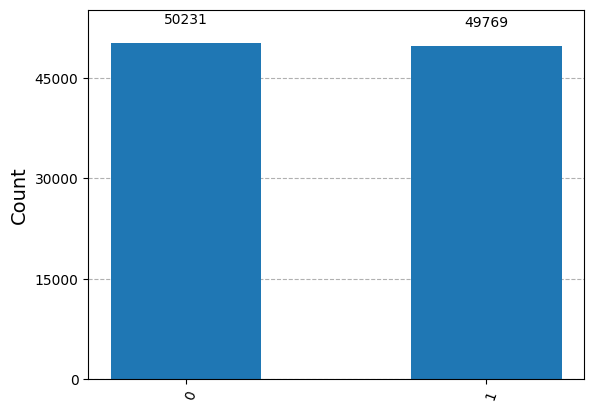

In [11]:
from qiskit.visualization import plot_histogram

statistics  = final_state.sample_counts(100000)
plot_histogram(statistics)